<a href="https://colab.research.google.com/github/asrask65/INSE-6220/blob/master/Asra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 7.1 MB/s 
     |████████████████████████████████| 167 kB 41.3 MB/s 
     |████████████████████████████████| 6.8 MB 44.8 MB/s 
     |████████████████████████████████| 1.7 MB 45.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 261 kB 49.6 MB/s 
     |████████████████████████████████| 2.0 MB 39.0 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 116 kB 53.7 MB/s 
     |████████████████████████████████| 16.5 MB 39.5 MB/s 
     |████████████████████████████████| 1.3 MB 39.8 MB/s 
     |████████████████████████████████| 3.1 MB 37.6 MB/s 
     |████████████████████████████████| 690 kB 47.1 MB/s 
     |████████████████████████████████| 102 kB 10.8 MB/s 
     |█████████████████

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

In [5]:
df = pd.read_csv('Abalone-6.csv')
df.head(25)

class  Length   Diameter   Height   Whole weigh  Shucked weight  \
0     Male     0.46       0.37     0.10         0.51            0.22   
1     Male     0.35       0.27     0.09         0.23            0.10   
2   Female     0.53       0.42     0.14         0.68            0.26   
3     Male     0.44       0.37     0.13         0.52            0.22   
4   Infant     0.33       0.26     0.08         0.21            0.09   
5   Infant     0.43       0.30     0.10         0.35            0.14   
6   Female     0.53       0.42     0.15         0.78            0.24   
7   Female     0.55       0.43     0.13         0.77            0.29   
8     Male     0.48       0.37     0.13         0.51            0.22   
9   Female     0.55       0.44     0.15         0.89            0.31   
10  Female     0.53       0.38     0.14         0.61            0.19   
11    Male     0.43       0.35     0.11         0.41            0.17   
12    Male     0.49       0.38     0.14         0.54            0.22   
13  Female     0.54       0.41     0.15         0.68            0.27   
14  Female     0.47       0.36     0.10         0.48            0.17   
15    Male     0.50       0.40     0.13         0.66            0.26   
16  Infant     0.36       0.28     0.09         0.29            0.10   
17  Female     0.44       0.34     0.10         0.45            0.19   
18    Male     0.37       0.30     0.08         0.26            0.10   
19    Male     0.45       0.32     0.10         0.38            0.17   
20    Male     0.36       0.28     0.10         0.25            0.10   
21  Infant     0.38       0.28     0.10         0.23            0.08   
22  Female     0.57       0.44     0.16         0.94            0.43   
23  Female     0.55       0.42     0.14         0.76            0.32   
24  Female     0.62       0.48     0.17         1.16            0.51   

    Viscera weight  Shell weight  
0             0.10          0.15  
1             0.05          0.07  
2             0.14          0.21  
3             0.11          0.16  
4             0.04          0.06  
5             0.08          0.12  
6             0.14          0.33  
7             0.15          0.26  
8             0.11          0.17  
9             0.15          0.32  
10            0.15          0.21  
11            0.08          0.14  
12            0.10          0.19  
13            0.17          0.21  
14            0.08          0.19  
15            0.13          0.24  
16            0.04          0.12  
17            0.09          0.13  
18            0.04          0.10  
19            0.08          0.12  
20            0.06          0.08  
21            0.05          0.09  
22            0.21          0.27  
23            0.21          0.20  
24            0.30          0.31

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           113 non-null    object 
 1   Length          113 non-null    float64
 2   Diameter        113 non-null    float64
 3   Height          113 non-null    float64
 4   Whole weigh     113 non-null    float64
 5   Shucked weight  113 non-null    float64
 6   Viscera weight  113 non-null    float64
 7   Shell weight    113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

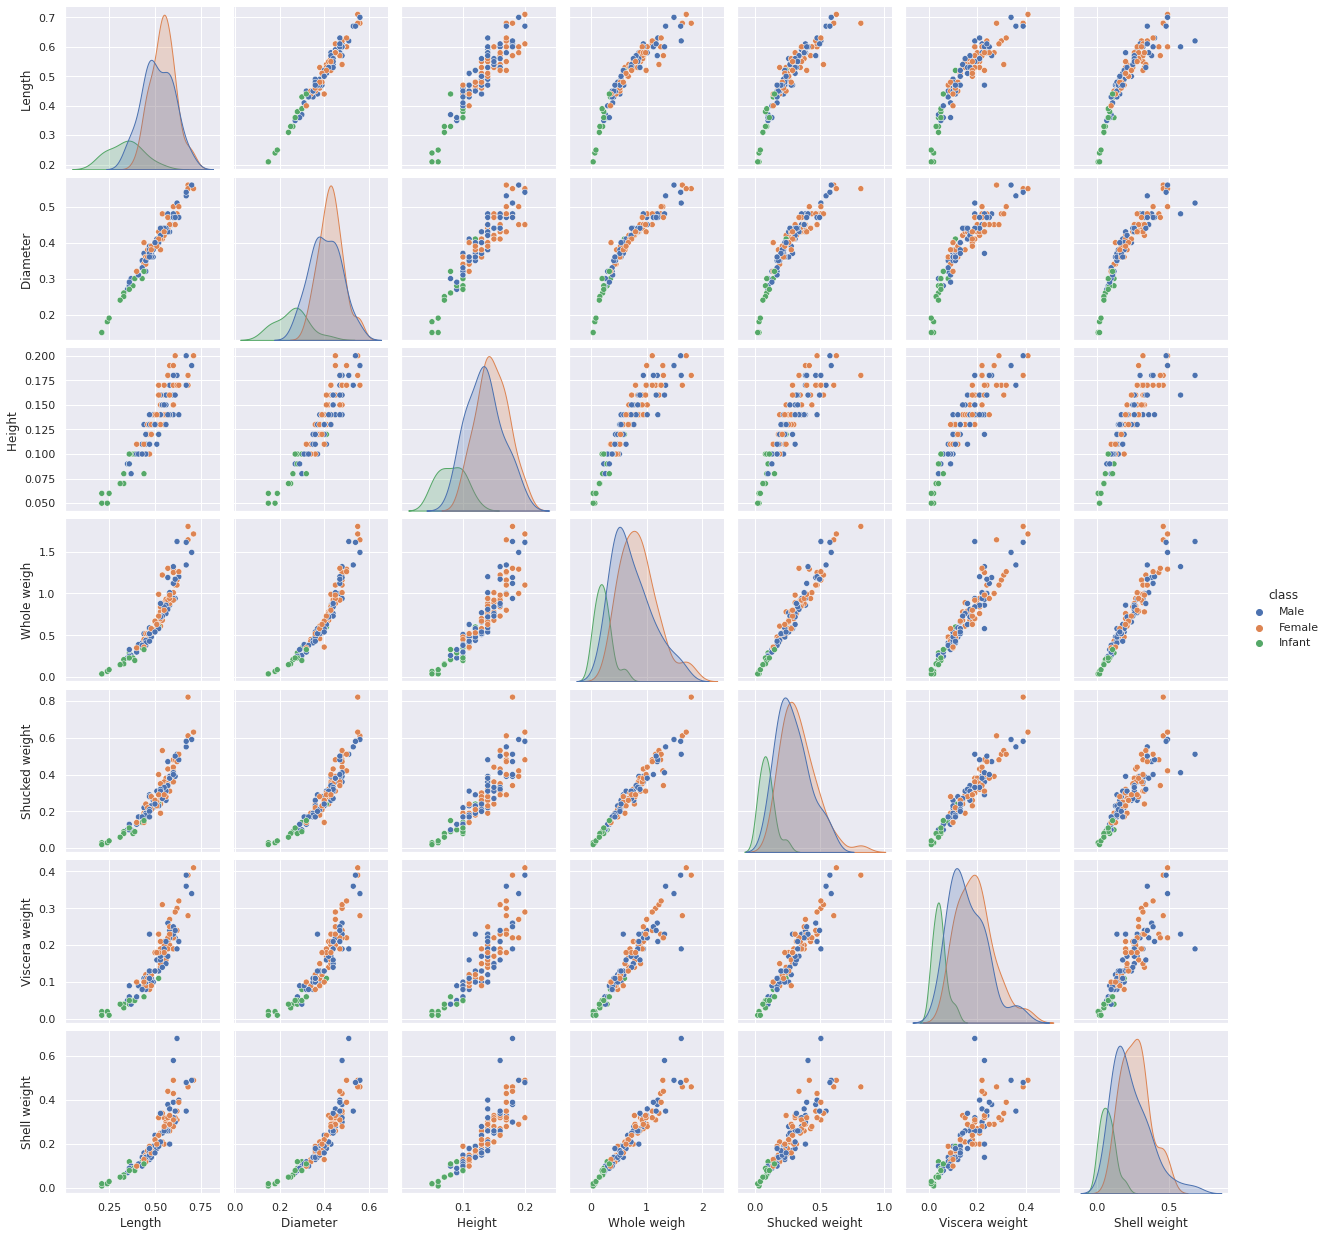

In [9]:
sns.pairplot(df, hue='class')
plt.show()

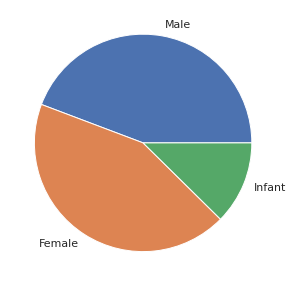

In [10]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['class'])
X.head(10)

Length   Diameter   Height   Whole weigh  Shucked weight  Viscera weight  \
0     0.46       0.37     0.10         0.51            0.22            0.10   
1     0.35       0.27     0.09         0.23            0.10            0.05   
2     0.53       0.42     0.14         0.68            0.26            0.14   
3     0.44       0.37     0.13         0.52            0.22            0.11   
4     0.33       0.26     0.08         0.21            0.09            0.04   
5     0.43       0.30     0.10         0.35            0.14            0.08   
6     0.53       0.42     0.15         0.78            0.24            0.14   
7     0.55       0.43     0.13         0.77            0.29            0.15   
8     0.48       0.37     0.13         0.51            0.22            0.11   
9     0.55       0.44     0.15         0.89            0.31            0.15   

   Shell weight  
0          0.15  
1          0.07  
2          0.21  
3          0.16  
4          0.06  
5          0.12  
6          0.33  
7          0.26  
8          0.17  
9          0.32

In [12]:
X.describe().transpose()

count      mean       std   min   25%   50%   75%   max
Length          113.0  0.505841  0.100425  0.21  0.45  0.52  0.58  0.71
Diameter        113.0  0.397257  0.082929  0.15  0.36  0.41  0.45  0.56
Height          113.0  0.133451  0.033402  0.05  0.11  0.14  0.16  0.20
Whole weigh     113.0  0.720619  0.384910  0.04  0.45  0.67  0.94  1.80
Shucked weight  113.0  0.286991  0.146695  0.02  0.19  0.27  0.38  0.82
Viscera weight  113.0  0.159115  0.085904  0.01  0.10  0.15  0.22  0.41
Shell weight    113.0  0.230708  0.126680  0.01  0.14  0.21  0.31  0.68

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Length   Diameter    Height   Whole weigh  Shucked weight  Viscera weight  \
0 -0.458499  -0.330138 -1.005953    -0.549629       -0.458704       -0.691214   
1 -1.558721  -1.541359 -1.306674    -1.280311       -1.280371       -1.275849   
2  0.241642   0.275472  0.196933    -0.106000       -0.184815       -0.223506   
3 -0.658540  -0.330138 -0.103789    -0.523533       -0.458704       -0.574287   
4 -1.758761  -1.662482 -1.607395    -1.332503       -1.348843       -1.392776   
5 -0.758560  -1.177993 -1.005953    -0.967162       -1.006482       -0.925068   
6  0.241642   0.275472  0.497654     0.154958       -0.321759       -0.223506   
7  0.441682   0.396595 -0.103789     0.128862        0.020602       -0.106579   
8 -0.258459  -0.330138 -0.103789    -0.549629       -0.458704       -0.574287   
9  0.441682   0.517717  0.497654     0.442012        0.157547       -0.106579   

   Shell weight  
0     -0.639941  
1     -1.274269  
2     -0.164195  
3     -0.560650  
4     -1.353560  
5     -0.877814  
6      0.787296  
7      0.232259  
8     -0.481359  
9      0.708005

In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Length          113.0 -2.161496e-16  1.004454 -2.959003 -0.558520  0.141621   
Diameter        113.0  1.542522e-16  1.004454 -2.994825 -0.451260  0.154350   
Height          113.0  3.438744e-16  1.004454 -2.509559 -0.705231  0.196933   
Whole weigh     113.0  1.021798e-16  1.004454 -1.776132 -0.706203 -0.132096   
Shucked weight  113.0  1.011973e-16  1.004454 -1.828149 -0.664120 -0.116342   
Viscera weight  113.0  8.449485e-17  1.004454 -1.743557 -0.691214 -0.106579   
Shell weight    113.0 -1.404973e-16  1.004454 -1.750015 -0.719232 -0.164195   

                     75%       max  
Length          0.741742  2.042004  
Diameter        0.638839  1.971182  
Height          0.798375  2.001260  
Whole weigh     0.572491  2.816731  
Shucked weight  0.636853  3.649633  
Viscera weight  0.711909  2.933522  
Shell weight    0.628714  3.562480

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

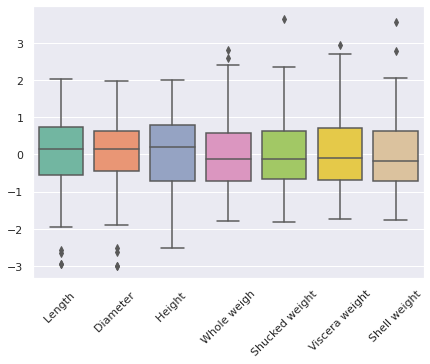

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

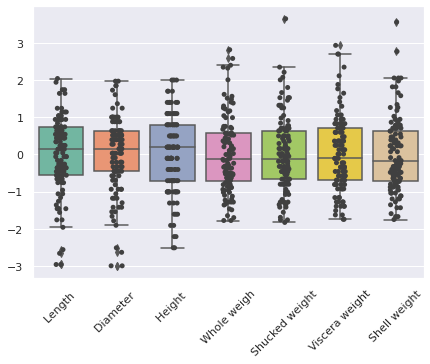

In [17]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

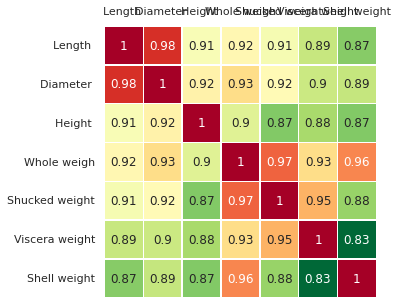

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

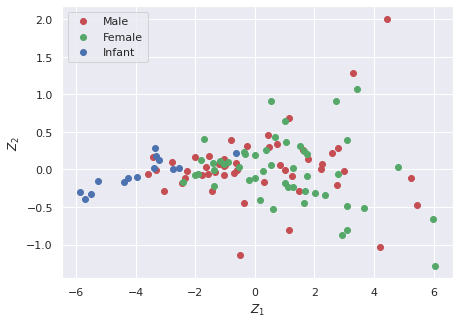

In [19]:
# Principal Component Analysis (PCA)
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_4 = np.where(y == 'Male')
idx_5 = np.where(y == 'Female')
idx_6 = np.where(y == 'Infant')


plt. figure()
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='Male')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='Female')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='Infant')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

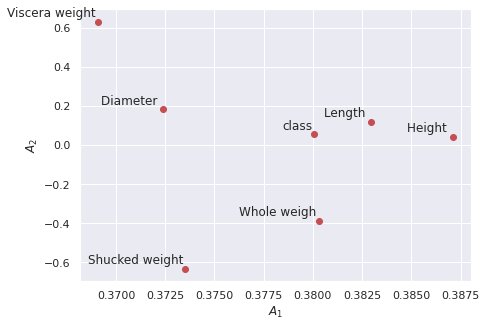

In [20]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


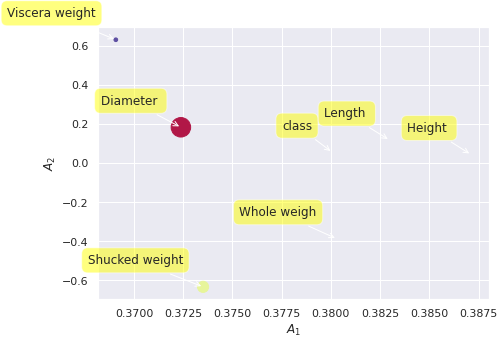

In [21]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

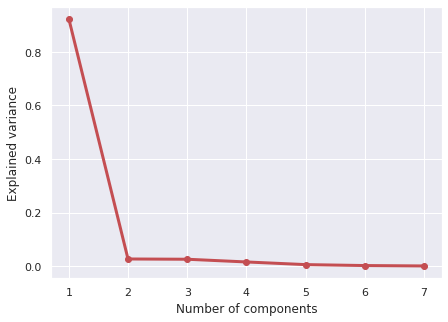

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

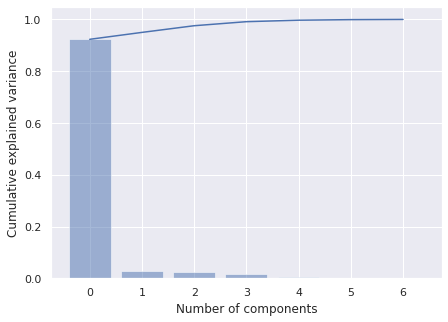

In [23]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

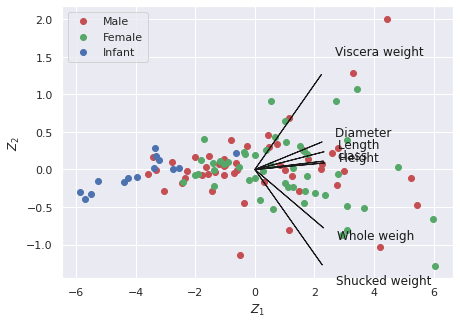

In [24]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='Male')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='Female')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='Infant')

plt.legend(loc='upper left')

## **Using PCA Library**

In [25]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=712f7e712fcdf7948a3da4329d3f523a1cf03d37afcf3746ce1e187db853b9c7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [26]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [27]:
out['PC']

PC1       PC2       PC3
0   -1.556871 -0.060255  0.032011
1   -3.598695 -0.062160  0.236794
2    0.015271  0.186719 -0.492352
3   -1.213907  0.070560 -0.193770
4   -3.952275 -0.094191  0.409654
..        ...       ...       ...
108 -0.183118 -0.139297 -0.362839
109 -1.800132  0.121327 -0.525371
110 -0.687033 -0.052140 -0.521951
111 -1.532808  0.185382 -0.144931
112 -2.744669  0.008826  0.085964

[113 rows x 3 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5edf63a4d0>)

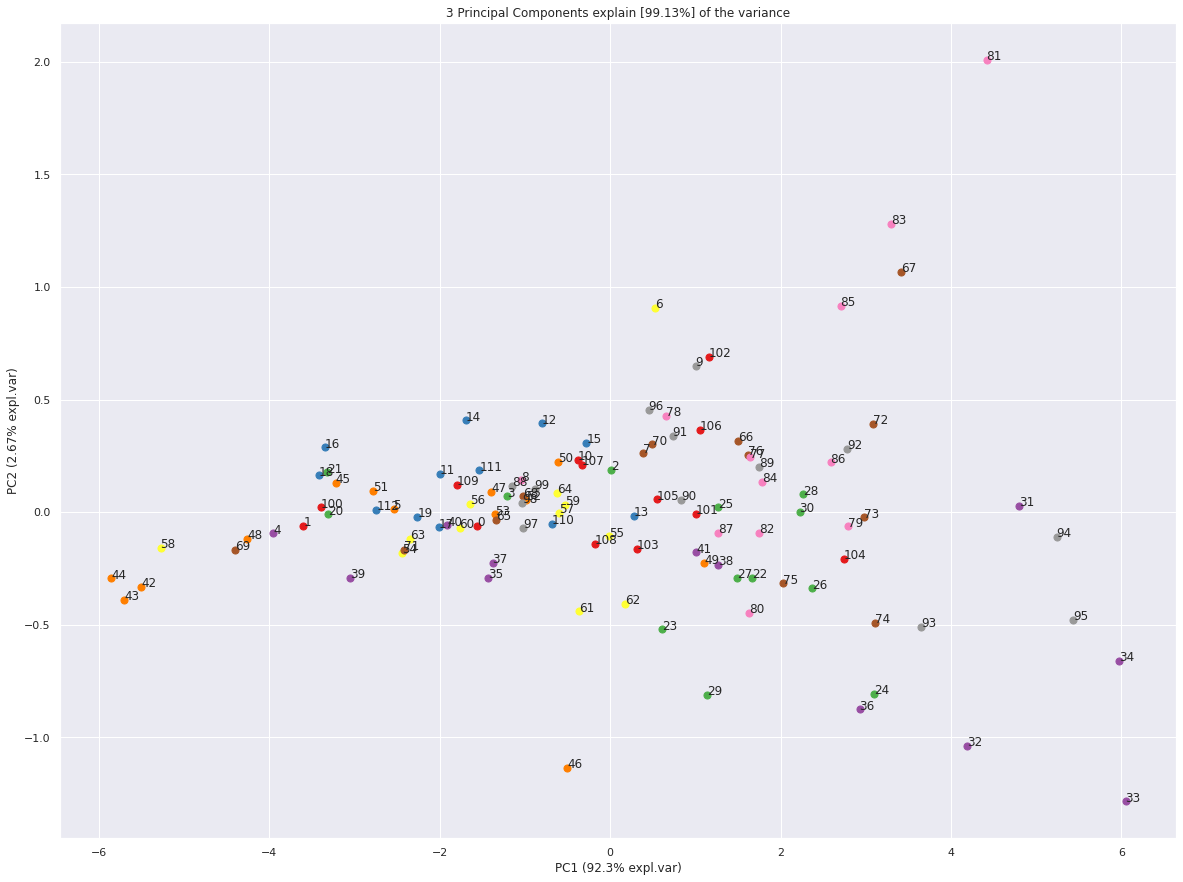

In [28]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [29]:
A = out['loadings'].T

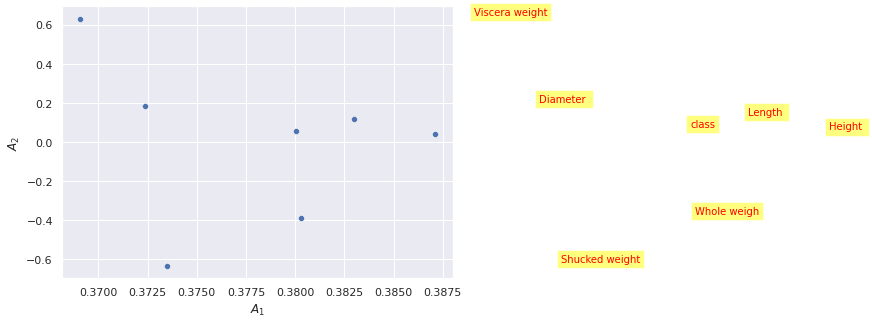

In [30]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

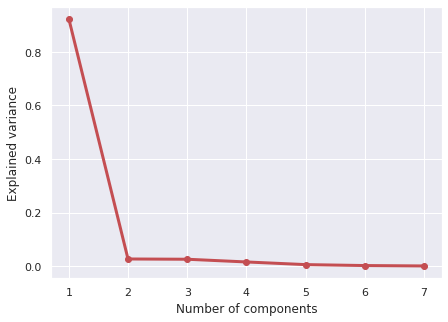

In [31]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

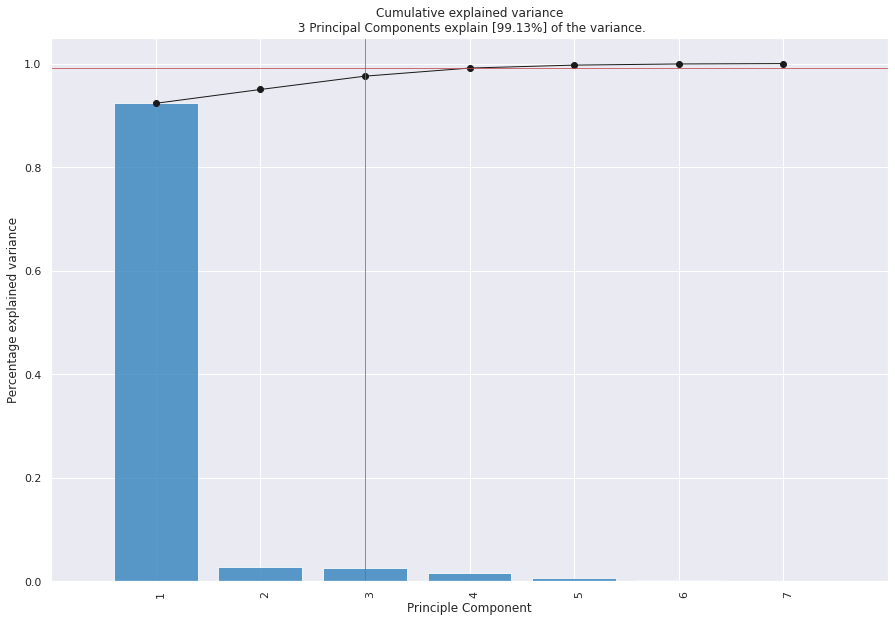

<Figure size 504x360 with 0 Axes>

In [32]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


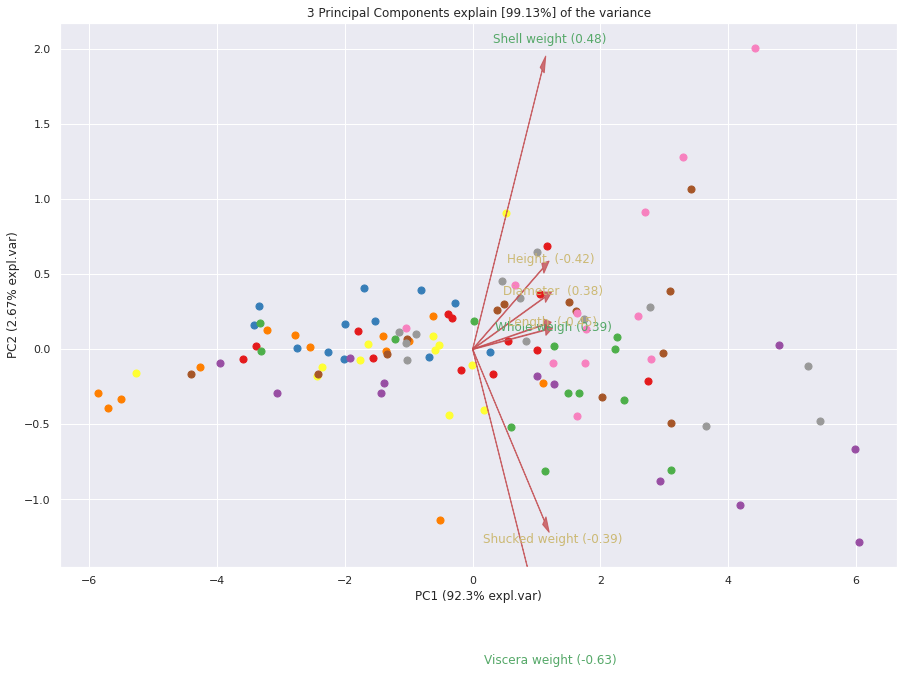

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5edd0e6b90>)

In [33]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


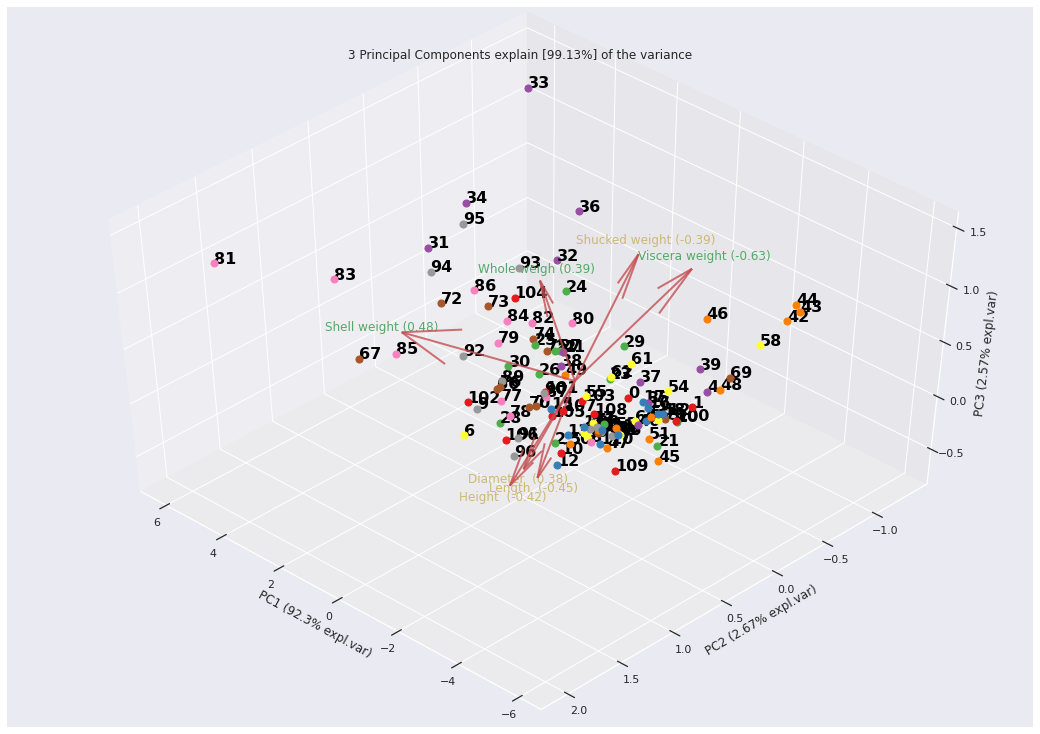

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f5ee1f8ce50>)

In [34]:
model.biplot3d(legend=False)

## **Classification**

**Using PyCaret**

In [35]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [36]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (102, 8)
Unseen Data For Predictions: (11, 8)


**Setting up the Environment in PyCaret**

In [37]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description                          Value
0                               session_id                            123
1                                   Target                          class
2                              Target Type                     Multiclass
3                            Label Encoded  Female: 0, Infant: 1, Male: 2
4                            Original Data                       (102, 8)
5                           Missing Values                          False
6                         Numeric Features                              7
7                     Categorical Features                              0
8                         Ordinal Features                          False
9                High Cardinality Features                          False
10                 High Cardinality Method                           None
11                   Transformed Train Set                        (71, 7)
12                    Transformed Test Set                        (31, 7)
13                      Shuffle Train-Test                           True
14                     Stratify Train-Test                          False
15                          Fold Generator                StratifiedKFold
16                             Fold Number                             10
17                                CPU Jobs                             -1
18                                 Use GPU                          False
19                          Log Experiment                          False
20                         Experiment Name               clf-default-name
21                                     USI                           459f
22                         Imputation Type                         simple
23          Iterative Imputation Iteration                           None
24                         Numeric Imputer                           mean
25      Iterative Imputation Numeric Model                           None
26                     Categorical Imputer                       constant
27  Iterative Imputation Categorical Model                           None
28           Unknown Categoricals Handling                 least_frequent
29                               Normalize                          False
30                        Normalize Method                           None
31                          Transformation                          False
32                   Transformation Method                           None
33                                     PCA                          False
34                              PCA Method                           None
35                          PCA Components                           None
36                     Ignore Low Variance                          False
37                     Combine Rare Levels                          False
38                    Rare Level Threshold                           None
39                         Numeric Binning                          False
40                         Remove Outliers                          False
41                      Outliers Threshold                           None
42                Remove Multicollinearity                          False
43             Multicollinearity Threshold                           None
44             Remove Perfect Collinearity                           True
45                              Clustering                          False
46                    Clustering Iteration                           None
47                     Polynomial Features                          False
48                       Polynomial Degree                           None
49                    Trignometry Features                          False
50                    Polynomial Threshold                           None
51                          Group Features                          False
52                       Feature Selection                          False
53                Feature Selection

**Comparing All Models**

In [38]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.6482  0.7125  0.6889  0.6263   
gbc          Gradient Boosting Classifier    0.6054  0.6579  0.6333  0.5913   
lightgbm  Light Gradient Boosting Machine    0.6054  0.6706  0.6556  0.5756   
lr                    Logistic Regression    0.5464  0.6732  0.5778  0.5227   
svm                   SVM - Linear Kernel    0.5357  0.0000  0.5944  0.3857   
nb                            Naive Bayes    0.5321  0.7236  0.6167  0.5356   
qda       Quadratic Discriminant Analysis    0.5232  0.6587  0.5333  0.5349   
ridge                    Ridge Classifier    0.5196  0.0000  0.5722  0.4866   
rf               Random Forest Classifier    0.5196  0.6268  0.5889  0.5035   
lda          Linear Discriminant Analysis    0.5054  0.6701  0.5722  0.5080   
et                 Extra Trees Classifier    0.4768  0.6170  0.5556  0.4477   
knn                K Neighbors Classifier    0.4500  0.5821  0.5333  0.4426   
ada                  Ada Boost Classifier    0.4339  0.5559  0.3778  0.3235   
dummy                    Dummy Classifier    0.4089  0.5000  0.3333  0.1692   

              F1   Kappa     MCC  TT (Sec)  
dt        0.6077  0.4385  0.4705     0.015  
gbc       0.5693  0.3640  0.3816     0.204  
lightgbm  0.5692  0.3610  0.3841     0.067  
lr        0.5235  0.2495  0.2505     0.325  
svm       0.4216  0.2442  0.3369     0.062  
nb        0.5090  0.2636  0.2775     0.017  
qda       0.4975  0.2174  0.2342     0.015  
ridge     0.4903  0.2170  0.2153     0.013  
rf        0.4960  0.2283  0.2447     0.464  
lda       0.4875  0.1945  0.2067     0.014  
et        0.4504  0.1552  0.1623     0.441  
knn       0.4371  0.1118  0.1147     0.117  
ada       0.3634  0.0496  0.0499     0.095  
dummy     0.2389  0.0000  0.0000     0.012

In [39]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Create Decision Tree Classifier**

In [40]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.7167  0.6667  0.3917  0.4812  0.4419  0.5353
1       0.8571  0.8750  0.8889  0.8929  0.8531  0.7667  0.7936
2       0.4286  0.5000  0.5556  0.4286  0.4286  0.0667  0.0667
3       0.4286  0.5000  0.3333  0.2143  0.2857  0.0000  0.0000
4       0.7143  0.7917  0.7778  0.7857  0.7238  0.5625  0.5809
5       0.7143  0.7917  0.7778  0.7857  0.7238  0.5625  0.5809
6       0.7143  0.7500  0.7778  0.7143  0.7143  0.5333  0.5333
7       0.8571  0.8750  0.8889  0.8929  0.8531  0.7667  0.7936
8       0.7143  0.7500  0.7778  0.8286  0.6786  0.5333  0.6228
9       0.4286  0.5750  0.4444  0.3286  0.3347  0.1515  0.1976
Mean    0.6482  0.7125  0.6889  0.6263  0.6077  0.4385  0.4705
SD      0.1581  0.1332  0.1778  0.2437  0.1975  0.2602  0.2690

In [41]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune Decision Tree Model**

In [42]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.6667  0.6667  0.3917  0.4812  0.4419  0.5353
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.5714  0.5536  0.6667  0.5714  0.5592  0.3000  0.3105
3       0.2857  0.3214  0.2222  0.1714  0.2143 -0.2500 -0.2858
4       0.4286  0.4107  0.5556  0.3143  0.3571  0.0667  0.0778
5       0.8571  0.8036  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.4286  0.5714  0.5556  0.4286  0.4286  0.0667  0.0667
7       0.7143  0.7679  0.7778  0.7143  0.7143  0.5333  0.5333
8       0.7143  0.9286  0.7778  0.7143  0.7143  0.5333  0.5333
9       0.8571  0.8714  0.8333  0.9048  0.8476  0.7812  0.8069
Mean    0.6482  0.6895  0.6944  0.6104  0.6170  0.4240  0.4372
SD      0.2131  0.2126  0.2068  0.2651  0.2370  0.3642  0.3760

In [43]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [44]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 9.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [45]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [46]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.6542  0.5556  0.3542  0.4143  0.2558  0.2753
1       0.5714  0.6607  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.4286  0.4821  0.5556  0.4286  0.4286  0.0667  0.0667
3       0.1429  0.2381  0.1111  0.1071  0.1224 -0.5000 -0.5217
4       0.5714  0.7500  0.6667  0.5714  0.5524  0.3438  0.3550
5       0.7143  0.7321  0.7778  0.7143  0.7143  0.5333  0.5333
6       0.2857  0.4821  0.4444  0.2500  0.2653 -0.1667 -0.1725
7       0.4286  0.6429  0.5556  0.4286  0.4286  0.0667  0.0667
8       0.4286  0.5536  0.5556  0.4286  0.4286  0.0667  0.0667
9       0.4286  0.6250  0.4444  0.5714  0.4571  0.1515  0.1670
Mean    0.4500  0.5821  0.5333  0.4426  0.4371  0.1118  0.1147
SD      0.1500  0.1438  0.1707  0.1678  0.1532  0.2733  0.2818

**Tune K Neighbors Model**

In [47]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.7417  0.5556  0.4688  0.5357  0.4000  0.4364
1       0.7143  0.8214  0.7778  0.7143  0.7143  0.5333  0.5333
2       0.4286  0.4821  0.5556  0.4286  0.4286  0.0667  0.0667
3       0.2857  0.4821  0.2222  0.1714  0.2143 -0.2500 -0.2858
4       0.4286  0.5179  0.3333  0.3571  0.3878  0.0000  0.0000
5       0.8571  0.9286  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.7143  0.7143  0.7778  0.7143  0.7143  0.5333  0.5333
7       0.5714  0.7679  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.8571  0.8036  0.8889  0.8929  0.8531  0.7667  0.7936
9       0.4286  0.5536  0.4444  0.5238  0.4476  0.1250  0.1291
Mean    0.5911  0.6813  0.6111  0.5735  0.5708  0.3242  0.3311
SD      0.1860  0.1518  0.2180  0.2206  0.1995  0.3203  0.3350

**Evaluate K Neighbors Model**

In [48]:
evaluate_model(tuned_knn)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [49]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.8250  0.7778  0.7917  0.7500  0.6279  0.6429
1       0.5714  0.6071  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.4286  0.6429  0.5556  0.3143  0.3571  0.0667  0.0778
3       0.4286  0.5714  0.3333  0.3571  0.3878  0.0000  0.0000
4       0.4286  0.8214  0.3333  0.3571  0.3878  0.0000  0.0000
5       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
6       0.7143  0.7143  0.7778  0.7143  0.7143  0.5333  0.5333
7       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.8571  0.7500  0.8889  0.8929  0.8531  0.7667  0.7936
9       0.1429  0.4429  0.1111  0.0857  0.1071 -0.4000 -0.4743
Mean    0.5464  0.6732  0.5778  0.5227  0.5235  0.2495  0.2505
SD      0.1930  0.1102  0.2320  0.2329  0.2093  0.3284  0.3493

**Tune Logistic Regression Model**

In [50]:
tuned_lr = tune_model(lr)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9000  0.7778  0.7917  0.7500  0.6279  0.6429
1       0.5714  0.6429  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.4286  0.5714  0.5556  0.3143  0.3571  0.0667  0.0778
3       0.4286  0.5714  0.3333  0.3571  0.3878  0.0000  0.0000
4       0.4286  0.7500  0.5556  0.2857  0.3401  0.1250  0.1380
5       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
6       0.7143  0.7857  0.7778  0.7143  0.7143  0.5333  0.5333
7       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.8571  0.8214  0.8889  0.8929  0.8531  0.7667  0.7936
9       0.4286  0.4786  0.3889  0.4571  0.4048  0.0667  0.0754
Mean    0.5750  0.6879  0.6278  0.5527  0.5485  0.3086  0.3193
SD      0.1468  0.1222  0.1649  0.1938  0.1696  0.2467  0.2507

**Evaluate Logistic Regression Model**

In [51]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [52]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.6542  0.6667  0.3917  0.4812  0.4419  0.5353
1       0.5714  0.7500  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.4286  0.4643  0.5556  0.4286  0.4286  0.0667  0.0667
3       0.2857  0.2679  0.2222  0.2500  0.2653 -0.2500 -0.2609
4       0.2857  0.5714  0.4444  0.2143  0.2381 -0.0938 -0.0968
5       0.8571  0.9643  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
7       0.5714  0.6429  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.5714  0.6429  0.6667  0.5714  0.5592  0.3000  0.3105
9       0.4286  0.6321  0.4444  0.5714  0.4571  0.1515  0.1670
Mean    0.5196  0.6268  0.5889  0.5035  0.4960  0.2283  0.2447
SD      0.1618  0.1707  0.1725  0.1846  0.1642  0.2684  0.2851

**Tune Random Forest Model**

In [53]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.6667  0.5556  0.3542  0.4143  0.2558  0.2753
1       0.5714  0.8214  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.4286  0.6071  0.5556  0.4286  0.4286  0.0667  0.0667
3       0.2857  0.2143  0.2222  0.1429  0.1905 -0.2500 -0.3689
4       0.4286  0.7917  0.5556  0.2857  0.3401  0.1250  0.1380
5       0.8571  0.9286  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.8571  0.7679  0.8889  0.8929  0.8531  0.7667  0.7936
7       0.7143  0.7857  0.7778  0.7143  0.7143  0.5333  0.5333
8       0.4286  0.6786  0.5556  0.2857  0.3401  0.1250  0.1380
9       0.7143  0.8643  0.7222  0.8571  0.7238  0.5758  0.6347
Mean    0.5786  0.7126  0.6389  0.5426  0.5417  0.3265  0.3315
SD      0.1875  0.1894  0.1880  0.2674  0.2215  0.3129  0.3463

**Evaluate Random Forest Model**

In [54]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Tune the Best Model**

In [55]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.6667  0.6667  0.3917  0.4812  0.4419  0.5353
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.5714  0.5536  0.6667  0.5714  0.5592  0.3000  0.3105
3       0.2857  0.3214  0.2222  0.1714  0.2143 -0.2500 -0.2858
4       0.4286  0.4107  0.5556  0.3143  0.3571  0.0667  0.0778
5       0.8571  0.8036  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.4286  0.5714  0.5556  0.4286  0.4286  0.0667  0.0667
7       0.7143  0.7679  0.7778  0.7143  0.7143  0.5333  0.5333
8       0.7143  0.9286  0.7778  0.7143  0.7143  0.5333  0.5333
9       0.8571  0.8714  0.8333  0.9048  0.8476  0.7812  0.8069
Mean    0.6482  0.6895  0.6944  0.6104  0.6170  0.4240  0.4372
SD      0.2131  0.2126  0.2068  0.2651  0.2370  0.3642  0.3760

In [56]:
tuned_best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate the Best Model**

In [57]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Classification + PCA**

In [58]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description                          Value
0                               session_id                            123
1                                   Target                          class
2                              Target Type                     Multiclass
3                            Label Encoded  Female: 0, Infant: 1, Male: 2
4                            Original Data                       (102, 8)
5                           Missing Values                          False
6                         Numeric Features                              7
7                     Categorical Features                              0
8                         Ordinal Features                          False
9                High Cardinality Features                          False
10                 High Cardinality Method                           None
11                   Transformed Train Set                        (71, 3)
12                    Transformed Test Set                        (31, 3)
13                      Shuffle Train-Test                           True
14                     Stratify Train-Test                          False
15                          Fold Generator                StratifiedKFold
16                             Fold Number                             10
17                                CPU Jobs                             -1
18                                 Use GPU                          False
19                          Log Experiment                          False
20                         Experiment Name               clf-default-name
21                                     USI                           7604
22                         Imputation Type                         simple
23          Iterative Imputation Iteration                           None
24                         Numeric Imputer                           mean
25      Iterative Imputation Numeric Model                           None
26                     Categorical Imputer                       constant
27  Iterative Imputation Categorical Model                           None
28           Unknown Categoricals Handling                 least_frequent
29                               Normalize                           True
30                        Normalize Method                         zscore
31                          Transformation                          False
32                   Transformation Method                           None
33                                     PCA                           True
34                              PCA Method                         linear
35                          PCA Components                              3
36                     Ignore Low Variance                          False
37                     Combine Rare Levels                          False
38                    Rare Level Threshold                           None
39                         Numeric Binning                          False
40                         Remove Outliers                          False
41                      Outliers Threshold                           None
42                Remove Multicollinearity                          False
43             Multicollinearity Threshold                           None
44             Remove Perfect Collinearity                           True
45                              Clustering                          False
46                    Clustering Iteration                           None
47                     Polynomial Features                          False
48                       Polynomial Degree                           None
49                    Trignometry Features                          False
50                    Polynomial Threshold                           None
51                          Group Features                          False
52                       Feature Selection                          False
53                Feature Selection

In [60]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.5625  0.0000  0.6111  0.5530   
lr                    Logistic Regression    0.5464  0.6554  0.6056  0.5356   
lda          Linear Discriminant Analysis    0.5339  0.6690  0.5667  0.5123   
nb                            Naive Bayes    0.5179  0.6405  0.5778  0.5250   
svm                   SVM - Linear Kernel    0.5179  0.0000  0.5944  0.4399   
qda       Quadratic Discriminant Analysis    0.5071  0.6420  0.5667  0.5005   
ada                  Ada Boost Classifier    0.4661  0.5817  0.4056  0.3634   
rf               Random Forest Classifier    0.4625  0.5533  0.5389  0.4747   
lightgbm  Light Gradient Boosting Machine    0.4625  0.6281  0.5333  0.4444   
knn                K Neighbors Classifier    0.4482  0.5907  0.5333  0.4087   
dt               Decision Tree Classifier    0.4375  0.5300  0.5111  0.4262   
et                 Extra Trees Classifier    0.4339  0.5347  0.5167  0.4311   
gbc          Gradient Boosting Classifier    0.4107  0.5465  0.4944  0.3904   
dummy                    Dummy Classifier    0.4089  0.5000  0.3333  0.1692   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.5441  0.2916  0.2990     0.020  
lr        0.5283  0.2641  0.2670     0.036  
lda       0.5080  0.2351  0.2381     0.023  
nb        0.5022  0.2111  0.2217     0.022  
svm       0.4569  0.2297  0.2693     0.076  
qda       0.4794  0.2161  0.2453     0.029  
ada       0.3766  0.1067  0.1391     0.161  
rf        0.4524  0.1348  0.1388     0.562  
lightgbm  0.4439  0.1252  0.1277     0.051  
knn       0.4173  0.1073  0.1172     0.133  
dt        0.4141  0.0993  0.1065     0.026  
et        0.4214  0.0809  0.0832     0.510  
gbc       0.3798  0.0590  0.0580     0.300  
dummy     0.2389  0.0000  0.0000     0.021

In [61]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Tune the Best Model**

In [62]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.0  0.6111  0.6875  0.6393  0.4286  0.4392
1       0.5714  0.0  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.4286  0.0  0.5556  0.3143  0.3571  0.0667  0.0778
3       0.2857  0.0  0.2222  0.1714  0.2143 -0.2500 -0.2858
4       0.4286  0.0  0.5556  0.2857  0.3401  0.1250  0.1380
5       0.5714  0.0  0.6667  0.5714  0.5592  0.3000  0.3105
6       0.7143  0.0  0.7778  0.7143  0.7143  0.5333  0.5333
7       0.7143  0.0  0.7778  0.7143  0.7143  0.5333  0.5333
8       0.7143  0.0  0.7778  0.7857  0.7238  0.5625  0.5809
9       0.2857  0.0  0.2778  0.3929  0.3129 -0.1290 -0.1336
Mean    0.5339  0.0  0.5889  0.5209  0.5135  0.2470  0.2504
SD      0.1594  0.0  0.1879  0.2035  0.1814  0.2716  0.2810

In [63]:
tuned_best_model_pca

RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Evaluate the Best Model**

In [64]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Explainable AI with Shapley values**

In [65]:
!pip install shap

     |████████████████████████████████| 564 kB 8.8 MB/s 


In [66]:
import shap

In [67]:

rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.7042  0.6667  0.6042  0.6000  0.4419  0.4524
1       0.7143  0.7143  0.7778  0.7143  0.7143  0.5333  0.5333
2       0.2857  0.5000  0.4444  0.2500  0.2653 -0.1667 -0.1725
3       0.2857  0.3571  0.2222  0.2500  0.2653 -0.2500 -0.2609
4       0.7143  0.7143  0.7778  0.8214  0.6769  0.5625  0.6211
5       0.5714  0.5000  0.6667  0.5714  0.5592  0.3000  0.3105
6       0.2857  0.5179  0.4444  0.2500  0.2653 -0.1667 -0.1725
7       0.4286  0.5000  0.5556  0.4286  0.4286  0.0667  0.0667
8       0.5714  0.6250  0.6667  0.5714  0.5592  0.3000  0.3105
9       0.1429  0.4000  0.1667  0.2857  0.1905 -0.2727 -0.3007
Mean    0.4625  0.5533  0.5389  0.4747  0.4524  0.1348  0.1388
SD      0.1934  0.1231  0.2050  0.2006  0.1838  0.3148  0.3313

In [68]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.7292  0.6667  0.7292  0.6018  0.4419  0.4756
1       0.5714  0.8214  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.2857  0.4643  0.4444  0.2500  0.2653 -0.1667 -0.1725
3       0.2857  0.5119  0.2222  0.2500  0.2653 -0.2500 -0.2609
4       0.7143  0.6190  0.7778  0.8214  0.6769  0.5625  0.6211
5       0.7143  0.7500  0.7778  0.8286  0.6786  0.5333  0.6228
6       0.7143  0.7500  0.7778  0.7143  0.7143  0.5333  0.5333
7       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.5714  0.6071  0.6667  0.5714  0.5592  0.3000  0.3105
9       0.4286  0.5750  0.3889  0.4571  0.4048  0.0667  0.0754
Mean    0.5482  0.6507  0.6056  0.5765  0.5284  0.2621  0.2826
SD      0.1557  0.1088  0.1799  0.1983  0.1553  0.2754  0.2963

**SHAP Summary Plot**

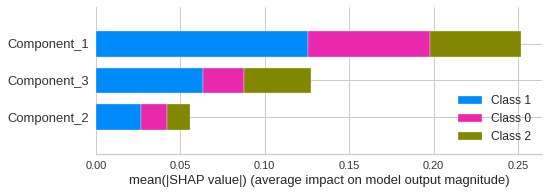

In [69]:
interpret_model(tuned_rf_pca, plot='summary')

In [70]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [73]:
interpret_model(tuned_rf_pca, plot='reason', observation=24)

**Visualize many predictions**

In [74]:
interpret_model(tuned_rf_pca, plot='reason')